# This project runs on google colab, the link for which is given here:

https://colab.research.google.com/drive/1z49FIqcTe84hjIzhRFFShtNbJRNKeT-b


# imports

In [0]:
import numpy as np

from keras.models import Model
from keras.layers import (Input, Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU)

Using TensorFlow backend.


In [0]:
import os
import cv2
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose, LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Load data


In [0]:
!wget https://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip

--2019-05-18 10:35:51--  https://openi.nlm.nih.gov/imgs/collections/ChinaSet_AllFiles.zip
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.52.157, 2607:f220:41e:7052::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3770205534 (3.5G) [application/zip]
Saving to: ‘ChinaSet_AllFiles.zip’

ChinaSet_AllFiles.z 100%[===================>]   3.51G  17.1MB/s    in 3m 31s  

2019-05-18 10:39:23 (17.0 MB/s) - ‘ChinaSet_AllFiles.zip’ saved [3770205534/3770205534]



In [0]:
!unzip ChinaSet_AllFiles.zip -d images/ 

Archive:  ChinaSet_AllFiles.zip
   creating: images/ChinaSet_AllFiles/ClinicalReadings/
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0001_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0002_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0003_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0004_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0005_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0006_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0007_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0008_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0009_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0010_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0011_0.txt  
 extracting: images/ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0012_0.txt  
 extracting:

In [0]:
# ls images/ChinaSet_AllFiles

In [0]:
rm ChinaSet_AllFiles.zip

In [0]:
rm images/ChinaSet_AllFiles/CXR_png/Thumbs.db

In [0]:
!rm -rf images/ChinaSet_AllFiles/ClinicalReadings/

In [0]:
!rm images/ChinaSet_AllFiles/NLM-ChinaCXRSet-ReadMe.docx

### new dataset download

In [0]:
!wget http://openi.nlm.nih.gov/imgs/collections/NLM-MontgomeryCXRSet.zip

URL transformed to HTTPS due to an HSTS policy
--2019-05-17 04:55:41--  https://openi.nlm.nih.gov/imgs/collections/NLM-MontgomeryCXRSet.zip
Resolving openi.nlm.nih.gov (openi.nlm.nih.gov)... 130.14.52.157, 2607:f220:41e:7052::157
Connecting to openi.nlm.nih.gov (openi.nlm.nih.gov)|130.14.52.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 616853875 (588M) [application/zip]
Saving to: ‘NLM-MontgomeryCXRSet.zip’

NLM-MontgomeryCXRSe 100%[===================>] 588.28M  13.2MB/s    in 50s     

2019-05-17 04:56:32 (11.9 MB/s) - ‘NLM-MontgomeryCXRSet.zip’ saved [616853875/616853875]



In [0]:
!unzip NLM-MontgomeryCXRSet.zip -d images/ 

In [0]:
!rm images/MontgomerySet/CXR_png/Thumbs.db

# Prepare Dataset csv file for chinaset 

In [0]:
# prepare dataset.csv file

import os
import csv

def parseTxtFile(filename):
  print("filename is ====> ", filename)
  temp = filename.split("." )
  temp = str(temp[0])
  temp = temp.split("_")
  label = temp[2]
  text = [filename, label]

  with open('dataset.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(text)
    csvFile.close()

        
             

datasetDir = os.path.join(os.getcwd(), "images/ChinaSet_AllFiles/CXR_png/")

for file_name in os.listdir(datasetDir):
             parseTxtFile(file_name)

filename is ====>  CHNCXR_0304_0.png
filename is ====>  CHNCXR_0359_1.png
filename is ====>  CHNCXR_0271_0.png
filename is ====>  CHNCXR_0607_1.png
filename is ====>  CHNCXR_0183_0.png
filename is ====>  CHNCXR_0400_1.png
filename is ====>  CHNCXR_0014_0.png
filename is ====>  CHNCXR_0300_0.png
filename is ====>  CHNCXR_0213_0.png
filename is ====>  CHNCXR_0645_1.png
filename is ====>  CHNCXR_0307_0.png
filename is ====>  CHNCXR_0430_1.png
filename is ====>  CHNCXR_0179_0.png
filename is ====>  CHNCXR_0497_1.png
filename is ====>  CHNCXR_0628_1.png
filename is ====>  CHNCXR_0242_0.png
filename is ====>  CHNCXR_0629_1.png
filename is ====>  CHNCXR_0521_1.png
filename is ====>  CHNCXR_0585_1.png
filename is ====>  CHNCXR_0243_0.png
filename is ====>  CHNCXR_0015_0.png
filename is ====>  CHNCXR_0507_1.png
filename is ====>  CHNCXR_0016_0.png
filename is ====>  CHNCXR_0466_1.png
filename is ====>  CHNCXR_0603_1.png
filename is ====>  CHNCXR_0565_1.png
filename is ====>  CHNCXR_0652_1.png
f

In [0]:
import pandas as pd
original_dataset = pd.read_csv("dataset.csv", header=None)
print(original_dataset.shape)
print("\n\n",original_dataset.head())

(662, 2)


                    0  1
0  CHNCXR_0304_0.png  0
1  CHNCXR_0359_1.png  1
2  CHNCXR_0271_0.png  0
3  CHNCXR_0607_1.png  1
4  CHNCXR_0183_0.png  0


# preparing MontgomerySet csv file

In [0]:
# prepare dataset.csv file

import os
import csv

def parseTxtFile(filename):
  print("filename is ====> ", filename)
  temp = filename.split("." )
  temp = str(temp[0])
  temp = temp.split("_")
  label = temp[2]
  text = [filename, label]

  with open('Montgomery_dataset.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(text)
    csvFile.close()

        
             

datasetDir = os.path.join(os.getcwd(), "images/MontgomerySet/CXR_png/")

for file_name in os.listdir(datasetDir):
             parseTxtFile(file_name)

In [0]:
import pandas as pd
original_dataset_2 = pd.read_csv("Montgomery_dataset.csv", header=None)
print(original_dataset_2.shape)
print("\n\n",original_dataset_2.head())

(138, 2)


                    0  1
0  MCUCXR_0074_0.png  0
1  MCUCXR_0203_1.png  1
2  MCUCXR_0113_1.png  1
3  MCUCXR_0003_0.png  0
4  MCUCXR_0103_0.png  0


In [0]:
# original_dataset = original_dataset.append(original_dataset_2) 
# original_dataset.shape

(800, 2)

In [0]:
original_dataset.head()

# Move images to one folder

In [0]:
!mv images/MontgomerySet/CXR_png/* images/ChinaSet_AllFiles/CXR_png/

# image full path

In [0]:
# ls images/ChinaSet_AllFiles/CXR_png/

In [0]:
import random
import pathlib
import os

datasetDir = os.path.join(os.getcwd(), "images/ChinaSet_AllFiles/")
data_root = pathlib.Path(datasetDir)
print(data_root,"=======")


all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
image_count

/content/images/ChinaSet_AllFiles =======


800

In [0]:
all_image_paths[:10]

['/content/images/ChinaSet_AllFiles/CXR_png/CHNCXR_0445_1.png',
 '/content/images/ChinaSet_AllFiles/CXR_png/CHNCXR_0276_0.png',
 '/content/images/ChinaSet_AllFiles/CXR_png/CHNCXR_0323_0.png',
 '/content/images/ChinaSet_AllFiles/CXR_png/CHNCXR_0535_1.png',
 '/content/images/ChinaSet_AllFiles/CXR_png/CHNCXR_0616_1.png',
 '/content/images/ChinaSet_AllFiles/CXR_png/MCUCXR_0074_0.png',
 '/content/images/ChinaSet_AllFiles/CXR_png/MCUCXR_0203_1.png',
 '/content/images/ChinaSet_AllFiles/CXR_png/CHNCXR_0637_1.png',
 '/content/images/ChinaSet_AllFiles/CXR_png/MCUCXR_0113_1.png',
 '/content/images/ChinaSet_AllFiles/CXR_png/CHNCXR_0140_0.png']

# Display one image from dataset

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

def show_single_image(image_arr):
  imshow(np.asarray(image_arr))


uint8
(2951, 3000, 3)


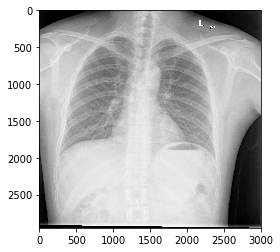

In [0]:
import cv2
sample_image = all_image_paths[2]

sample_image = cv2.imread(sample_image)
show_single_image(sample_image)

print(sample_image.dtype)
print(sample_image.shape)

# model

In [0]:
import keras
from keras.layers.normalization import BatchNormalization
def DAE_CNN(features_shape):
#     act=keras.layers.LeakyReLU(alpha=0.3)
    
    act = 'relu'  
    #input = 28 x 28 x 1 (wide and thin)
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    #encoder
    conv1 = Conv2D(32, (3, 3), activation=act, padding='same', name='en_conv1')(o) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation=act, padding='same', name='en_conv2')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), name='en_pool1')(conv1) #14 x 14 x 32
 
    conv2 = Conv2D(64, (3, 3), activation=act, padding='same', name='en_conv3')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation=act, padding='same', name='en_conv4')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), name='en_pool2')(conv2) #7 x 7 x 64
    
    conv3 = Conv2D(100, (3, 3), activation=act, padding='same', name='en_conv5')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(100, (3, 3), activation=act, padding='same', name='en_conv6')(conv3)
    conv3 = BatchNormalization()(conv3)
    
    conv3 = Conv2D(128, (3, 3), activation=act, padding='same', name='en_conv7')(conv3) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation=act, padding='same', name='en_conv8')(conv3)
    encoded = BatchNormalization()(conv3)

    encoder = Model(x, encoded)
    
    #decoder
    conv4 = Conv2D(64, (3, 3), activation=act, padding='same', name='de_conv1')(encoded) #7 x 7 x 128
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(64, (3, 3), activation=act, padding='same', name='de_conv2')(conv4)
    conv4 = BatchNormalization()(conv4)
    up1 = UpSampling2D((2,2), name='upsampling1')(conv4) # 14 x 14 x 128
    
    conv5 = Conv2D(32, (3, 3), activation=act, padding='same', name='de_conv3')(up1) # 14 x 14 x 64
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(32, (3, 3), activation=act, padding='same', name='de_conv4')(conv5)
    conv5 = BatchNormalization()(conv5)
    up2 = UpSampling2D((2,2), name='upsampling2')(conv5) # 28 x 28 x 64
    
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='de_conv5')(up2) # 28 x 28 x 1
    
    
#     # Print network summary
    Model(inputs=x, outputs=decoded).summary()
  
    autoencoder_model_def = Model(inputs=x, outputs=decoded)
    
    return autoencoder_model_def, encoder

In [0]:
batch_size = 32
epochs = 1
input_shape = (128, 128, 1)

autoencoder_model, encoder_model = DAE_CNN(input_shape)
autoencoder_model.compile(optimizer='adadelta', loss='mean_squared_error')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 128, 128, 1)       0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
en_conv2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 64, 64, 32)        0         
_________________________________________________________________
en_conv3 (Conv2D)            (None, 64, 64, 64)        18496     
__________

# Keras datagenerator to load images

**Datagenerator**

In [0]:
!mkdir train_gen_images

In [0]:
!mkdir valid_gen_images

In [0]:
auto_target_size = (128,128)
auto_batch_size = 32

In [0]:
from keras.preprocessing.image import ImageDataGenerator

autoencoder_datagen = ImageDataGenerator(            
            rescale=1./255,
            zoom_range=0.1,
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=True,
            validation_split=0.2 )


autoencoder_train_generator = autoencoder_datagen.flow_from_directory(
                            '/content/images/ChinaSet_AllFiles',
                            subset="training",
                            batch_size=auto_batch_size,
                            seed=42,
                            shuffle=True,
                            class_mode=None,
                            target_size=auto_target_size,
                             color_mode =  "grayscale"
                            #     ,save_to_dir = "./train_gen_images/" 
                            )

autoencoder_valid_generator = autoencoder_datagen.flow_from_directory(
                                '/content/images/ChinaSet_AllFiles',
                                subset="validation",
                                batch_size=auto_batch_size,
                                seed=42,
                                shuffle=True,
                                class_mode=None,
                              target_size=auto_target_size,
                             color_mode =  "grayscale"
                              #     ,save_to_dir = "./valid_gen_images/" 
                              )


Found 530 images belonging to 2 classes.


In [0]:
print (type(next(autoencoder_train_generator)))
print (next(autoencoder_train_generator).shape)

<class 'numpy.ndarray'>
(32, 128, 128, 1)


In [0]:
autoencoder_valid_generator = autoencoder_datagen.flow_from_directory(
                                '/content/images/ChinaSet_AllFiles',
                                subset="validation",
                                batch_size=auto_batch_size,
                                seed=42,
                                shuffle=True,
                                class_mode=None,
                              target_size=auto_target_size,
                             color_mode =  "grayscale"
#     ,save_to_dir = "./valid_gen_images/" 
)


Found 132 images belonging to 2 classes.


In [0]:
print (type(next(autoencoder_valid_generator)))
print (next(autoencoder_valid_generator).shape)

<class 'numpy.ndarray'>
(32, 128, 128, 1)


# training autoencoder

In [0]:
def fixed_generator(generator):
    for batch in generator:
        yield (batch, batch)

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks.
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss', 
    patience=2, 
    verbose=1, 
    factor=0.4, 
    min_lr=0.000001)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0, 
    patience=3, 
    verbose=1, 
    mode='auto')         

model_checkpoit = ModelCheckpoint(monitor='val_loss', 
                                  filepath='autoencoder_model' + '.hdf5',
                                  save_best_only=True, 
                                  save_weights_only=False,
                                  mode='min')

In [0]:
nb_epoch = 2

STEP_SIZE_TRAIN=autoencoder_train_generator.n//autoencoder_train_generator.batch_size
STEP_SIZE_VALID=autoencoder_valid_generator.n//autoencoder_valid_generator.batch_size
print(STEP_SIZE_TRAIN, STEP_SIZE_VALID)

# model_fname = 'autoencoder_model'

# callbacks = [ModelCheckpoint(monitor='val_loss', filepath=model_fname + '.hdf5',
#                              save_best_only=True, save_weights_only=True,
#                              mode='min')]


autoencoder_train = autoencoder_model.fit_generator(
                        generator = fixed_generator(autoencoder_train_generator),
                        steps_per_epoch = STEP_SIZE_TRAIN,

                        validation_data = fixed_generator(autoencoder_valid_generator),
                        validation_steps = STEP_SIZE_VALID,
                        epochs = nb_epoch,
#                         callbacks = callbacks)
    callbacks=[learning_rate_reduction, early_stopping, model_checkpoit])


16 4
Epoch 1/2
16/16 [==============================] - 61s 4s/step - loss: 0.0331 - val_loss: 0.0185
Epoch 2/2
16/16 [==============================] - 43s 3s/step - loss: 0.0086 - val_loss: 0.0100


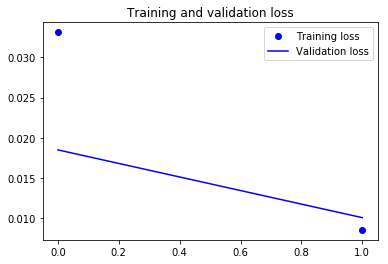

In [0]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(2)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Get encoder weights

In [0]:
input_shape = (128, 128, 1)

autoencoder_model, _ = DAE_CNN(input_shape)

In [0]:
autoencoder_model.load_weights('autoencoder_model.hdf5')

In [0]:
encoder_model = Model(autoencoder_model.inputs, autoencoder_model.layers[-12].output)

In [0]:
encoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 128, 128, 1)       0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
en_conv2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 64, 64, 32)        0         
_________________________________________________________________
en_conv3 (Conv2D)            (None, 64, 64, 64)        18496     
__________

# Test autoencoder

In [0]:
sample_image_batch = next(autoencoder_valid_generator)

In [0]:
pred = autoencoder_model.predict(sample_image_batch)

In [0]:
print(sample_image_batch.shape)
print(pred.shape)

print(type(sample_image_batch))
print(type(pred))

In [0]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi']= 80


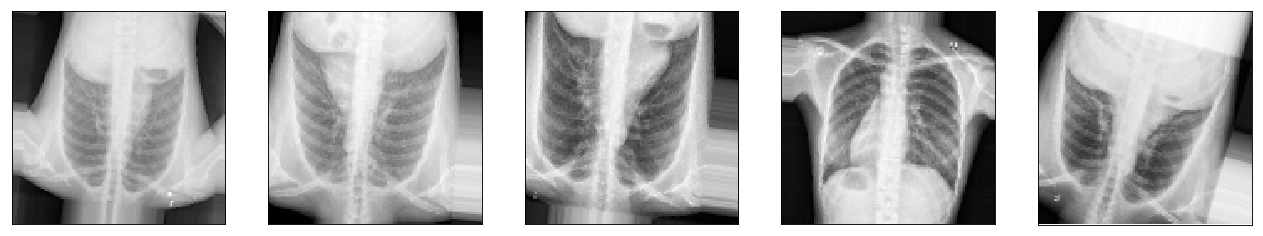

In [0]:
plt.figure(figsize=(20, 4))
for i in range(5):
    image = np.squeeze(sample_image_batch[i])
    
    plt.subplot(1, 5, i+1)
    plt.imshow(image[:,:], cmap='gray') 
    plt.yticks([])
    plt.xticks([])
plt.show()    

predicted images


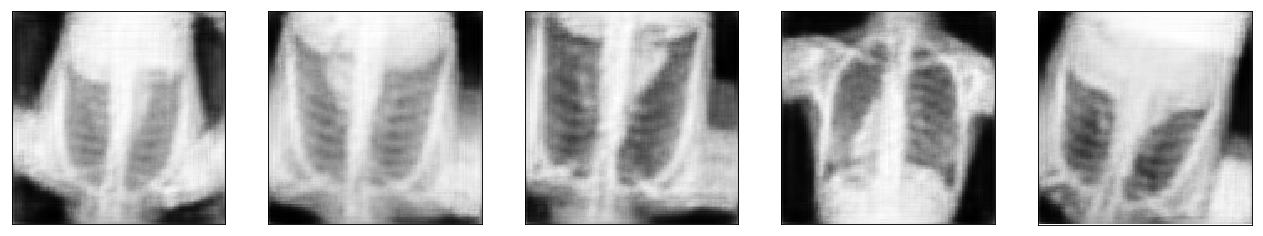

In [0]:
plt.figure(figsize=(20, 4))
print("predicted images")
for i in range(5):
    pred_img = np.squeeze(pred[i])
    
    plt.subplot(1, 5, i+1)
    plt.imshow(pred_img[:,:], cmap='gray') 
    plt.yticks([])
    plt.xticks([])
plt.show()    

# Training dense layers

In [0]:
autoencoder_dataset = original_dataset.copy()

In [0]:
autoencoder_dataset.head()

,0,1
0,CHNCXR_0445_1.png,1
1,CHNCXR_0276_0.png,0
2,CHNCXR_0323_0.png,0
3,CHNCXR_0535_1.png,1
4,CHNCXR_0616_1.png,1


In [0]:
def prepend_path(fn):
    return "/content/images/ChinaSet_AllFiles/CXR_png/"+fn

autoencoder_dataset[0] = autoencoder_dataset[0].apply(prepend_path)

In [0]:
autoencoder_dataset.rename(columns={0: 'image_loc', 1: 'target_label'}, inplace=True)


In [0]:
autoencoder_dataset = autoencoder_dataset.applymap(str)

In [0]:
autoencoder_dataset.head()

,image_loc,target_label
0,/content/images/ChinaSet_AllFiles/CXR_png/CHNC...,1
1,/content/images/ChinaSet_AllFiles/CXR_png/CHNC...,0
2,/content/images/ChinaSet_AllFiles/CXR_png/CHNC...,0
3,/content/images/ChinaSet_AllFiles/CXR_png/CHNC...,1
4,/content/images/ChinaSet_AllFiles/CXR_png/CHNC...,1


In [0]:
from sklearn.model_selection import train_test_split

nn_autoencoder_train, nn_autoencoder_test = train_test_split(autoencoder_dataset, test_size=0.2)

print(nn_autoencoder_train.shape)
print(nn_autoencoder_test.shape)

(640, 2)
(160, 2)


In [0]:
auto_batch_size = 32
auto_target_size = (128, 128)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

nn_datagen = ImageDataGenerator(
            
            rescale=1./255,
            zoom_range=0.1,
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=True,
            validation_split=0.2 )


nn_train_generator = nn_datagen.flow_from_dataframe(
                            dataframe = nn_autoencoder_train,
                            subset="training",
    
                            x_col= 'image_loc', 
                            y_col= 'target_label',
                            batch_size=auto_batch_size,
                            seed=42,
                            shuffle=True,
                            class_mode="categorical",
                            target_size=auto_target_size,
                            color_mode =  "grayscale")


nn_valid_generator = nn_datagen.flow_from_dataframe(
                                dataframe = nn_autoencoder_train,
                                subset="validation",
    
                                x_col= 'image_loc', 
                                y_col= 'target_label',
                                batch_size=auto_batch_size,
                                seed=42,
                                shuffle=True,
                                class_mode="categorical",
                            target_size=auto_target_size,
                                color_mode =  "grayscale")


Found 512 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


In [0]:
nn_test_datagen=ImageDataGenerator(rescale=1./255.)

nn_test_generator = nn_datagen.flow_from_dataframe(
                                dataframe = nn_autoencoder_test,
    
                                x_col= 'image_loc', 
                                y_col= 'target_label',
                                batch_size=auto_batch_size,
                                seed=42,
                                shuffle=True,
                                class_mode="categorical",
                            target_size=auto_target_size,
                                color_mode =  "grayscale")


Found 160 images belonging to 2 classes.


Autoencoder fits nicely to the data:

Next step will be to extract features from pretrained Autoencoder.

As mentioned earlier, we are taking outputs of neurons located in all hidden layers (encoder, bottleneck and decoder layers) as new representation of the data, however other strategies imply taking only encoder and bottleneck or other combinations.

Clean version of training and testing data is passed through the Autoencoder network to produce new representations  features_train  and  features_test  , respectively.  



**Now We use these representations in classification task**

 ModelCheckpoint callback is used to monitor validation accuracy after each epoch and save the model with best performance.
 
 There is also no doubt we can improve the performance even more with proper hyperoptimization or using different models such as XGBoost to perform a classification task.

In [0]:
encoder_model.trainable = False

In [0]:
# Create model for labelling images.
# act = 'relu'
act=keras.layers.LeakyReLU(alpha=0.3)

out = (encoder_model.output)
out = Flatten()(out)
out = Dense(2048, activation=act, name='dense1')(out)

out = Dropout(0.2)(out)
out = Dense(1024, activation=act, name='dense2')(out)

out = Dropout(0.3)(out)
out = Dense(1024, activation=act, name='dense3')(out)

out = Dropout(0.2)(out)
out = Dense(512, activation=act, name='dense4')(out)


out = Dense(2, activation='softmax')(out)

labeller = Model(encoder_model.input, out)

print(labeller.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 128, 128, 1)       0         
_________________________________________________________________
en_conv1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
en_conv2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 64, 64, 32)        0         
_________________________________________________________________
en_conv3 (Conv2D)            (None, 64, 64, 64)        18496     
__________

/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [0]:
optimizer = keras.optimizers.RMSprop(lr=1e-4)

# optimizer = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

labeller.compile(optimizer=optimizer,
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

In [0]:
nb_epoch = 30

NN_STEP_SIZE_TRAIN = nn_train_generator.n//nn_train_generator.batch_size
NN_STEP_SIZE_VALID = nn_valid_generator.n//nn_valid_generator.batch_size

print(NN_STEP_SIZE_TRAIN, NN_STEP_SIZE_VALID)


16 4


In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks.
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc', 
    patience=2, 
    verbose=1, 
    factor=0.4, 
    min_lr=0.000001)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0, 
    patience=3, 
    verbose=1, 
    mode='auto')         

model_checkpoit = ModelCheckpoint(monitor='val_loss', 
                                  filepath='labeller_model' + '.hdf5',
                                  save_best_only=True, 
                                  save_weights_only=True,
                                  mode='min')

In [0]:
history = labeller.fit_generator( generator = nn_train_generator,
                                  steps_per_epoch = NN_STEP_SIZE_TRAIN,
                                  validation_data = nn_valid_generator,
                                  validation_steps = NN_STEP_SIZE_VALID,                  
                                  epochs = nb_epoch,
                                  callbacks=[learning_rate_reduction, early_stopping, model_checkpoit])

Epoch 1/30
16/16 [==============================] - 93s 6s/step - loss: 4.5143 - acc: 0.6758 - val_loss: 5.5050 - val_acc: 0.6250
Epoch 2/30
16/16 [==============================] - 69s 4s/step - loss: 4.0424 - acc: 0.7344 - val_loss: 6.3080 - val_acc: 0.5938
Epoch 3/30
16/16 [==============================] - 72s 5s/step - loss: 4.1520 - acc: 0.7285 - val_loss: 8.7665 - val_acc: 0.4531

Epoch 00003: ReduceLROnPlateau reducing learning rate to 3.9999998989515007e-05.
Epoch 4/30
16/16 [==============================] - 69s 4s/step - loss: 4.3580 - acc: 0.7168 - val_loss: 6.9476 - val_acc: 0.5547
Epoch 00004: early stopping


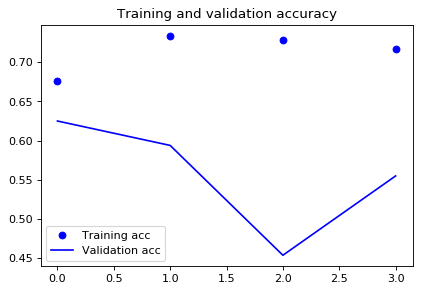

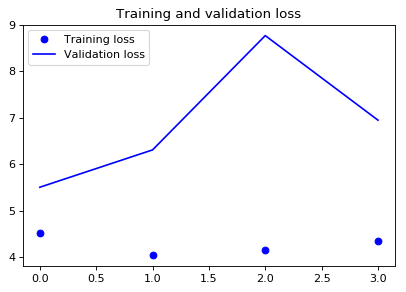

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
results_VALID_ds = labeller.evaluate_generator(generator = nn_valid_generator, 
                                      steps=NN_STEP_SIZE_VALID, 
                                      max_queue_size=10, 
                                      workers=1, 
                                      use_multiprocessing=False, 
                                      verbose=0)

In [0]:
results_VALID_ds

[7.024626970291138, 0.546875]

In [0]:
NN_STEP_SIZE_TEST = nn_test_generator.n//nn_test_generator.batch_size

print(NN_STEP_SIZE_TEST)


5


In [0]:
test_loss, test_acc = labeller.evaluate_generator(generator = nn_test_generator, 
                                      steps=NN_STEP_SIZE_TEST, 
                                      max_queue_size=10, 
                                      workers=1, 
                                      use_multiprocessing=False, 
                                      verbose=0)

In [0]:
print("accuracy : ",test_acc)

accuracy :  0.6


In [0]:
labeller.metrics_names

['loss', 'acc']

# sample output

In [0]:
predicted_label = labeller.predict_generator(nn_test_generator, steps = NN_STEP_SIZE_TEST)


In [0]:
nn_sample_image_batch = next(nn_test_generator)

In [0]:
actual_labels = nn_sample_image_batch[1]

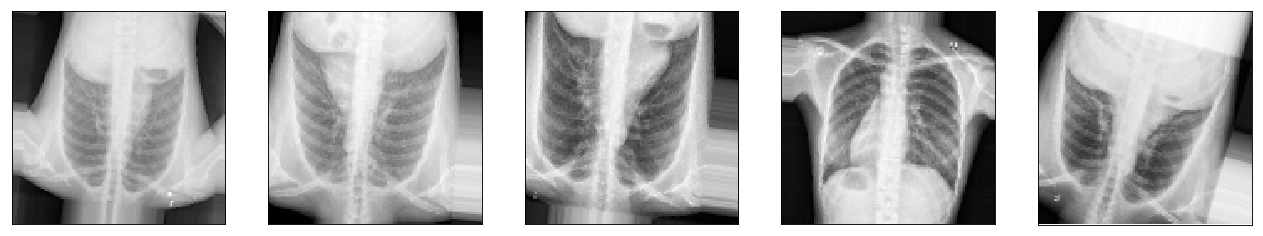

In [0]:
plt.figure(figsize=(20, 4))
for i in range(1):
    image = np.squeeze(sample_image_batch[i])
    
    plt.subplot(1, 5, i+1)
    plt.imshow(image[:,:], cmap='gray') 
    plt.yticks([])
    plt.xticks([])
plt.show()    

In [0]:
predicted_label[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
actual_labels[0:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
predicted_label[0:5] == actual_labels[0:5]

array([[ True,  True],
       [False, False],
       [ True,  True],
       [ True,  True],
       [ True,  True]])